In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data_path = '../data/Telecom_customer churn.csv'
df = pd.read_csv(data_path)
df_original = df.copy()
print(df.shape)
df.head()

(100000, 100)


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [5]:
dtypes = [str(t) for t in df.dtypes.values]
info_df = pd.DataFrame({'column': df.count().index, 'count': df.count().values, 'dtype': dtypes})
display(info_df.head())
display(info_df.sort_values('count')[:10])

,column,count,dtype
0,rev_Mean,99643,float64
1,mou_Mean,99643,float64
2,totmrc_Mean,99643,float64
3,da_Mean,99643,float64
4,ovrmou_Mean,99643,float64


,column,count,dtype
87,numbcars,50634,float64
89,dwllsize,61692,object
88,HHstatin,62077,object
80,ownrent,66294,object
82,dwlltype,68091,object
81,lor,69810,float64
86,income,74564,float64
84,adults,76981,float64
85,infobase,77921,object
77,hnd_webcap,89811,object


In [6]:
for dtype in ['float64', 'int64', 'object']:
    print('{}: {}'.format(dtype, len(info_df[info_df['dtype'] == dtype])))

float64: 69
int64: 10
object: 21


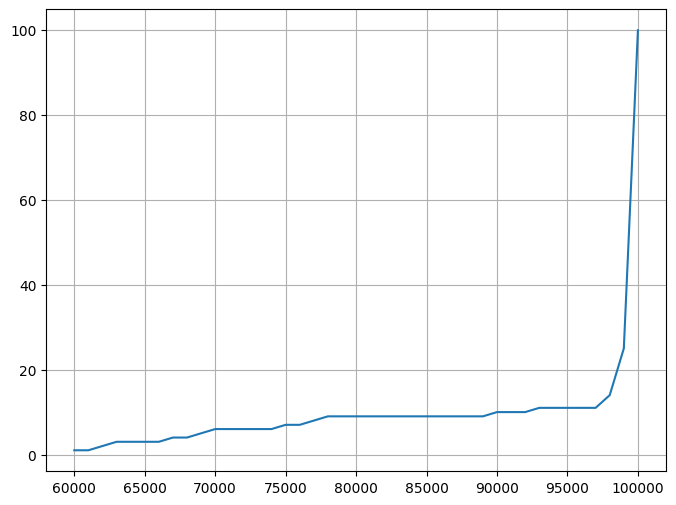

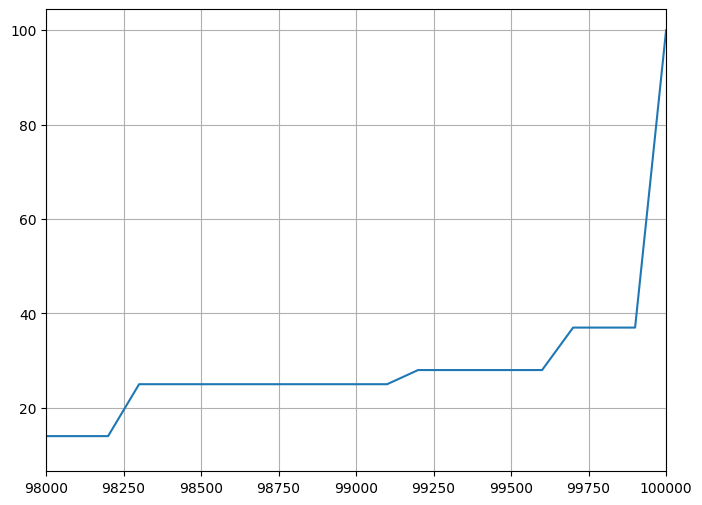

In [7]:
counts = np.arange(60000, 100001, 1000)
y = [len(info_df[info_df['count'] <= c]) for c in counts]

plt.figure(figsize=(8, 6))
plt.plot(counts, y)
plt.grid()
plt.show()

counts = np.arange(95000, 100001, 100)
y = [len(info_df[info_df['count'] <= c]) for c in counts]
plt.figure(figsize=(8, 6))
plt.plot(counts, y)
plt.xlim(98000, 100000)
plt.grid()
plt.show()

In [8]:
remove_columns_df = info_df[info_df['count'] < 99000]
for dtype in ['float64', 'int64', 'object']:
    print('{}: {}'.format(dtype, len(remove_columns_df[remove_columns_df['dtype'] == dtype])))
remove_columns_df

float64: 10
int64: 0
object: 15


,column,count,dtype
67,avg6mou,97161,float64
68,avg6qty,97161,float64
69,avg6rev,97161,float64
70,prizm_social_one,92612,object
77,hnd_webcap,89811,object
78,truck,98268,float64
79,rv,98268,float64
80,ownrent,66294,object
81,lor,69810,float64
82,dwlltype,68091,object


In [9]:
columns = list(df.columns)
for rmcol in remove_columns_df['column']:
    columns.remove(rmcol)
columns.remove('Customer_ID')

### objectデータ

In [10]:
categorical_columns = []
for col in columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)

for col in categorical_columns:
    categ_set = set(df[col])
    if len(categ_set) >= 10:
        categorical_columns.remove(col)
        columns.remove(col)
    print(col + ': ' + str(categ_set))
df[categorical_columns].info()
print(len(columns))

new_cell: {'U', 'Y', 'N'}
crclscod: {'Z4', 'Z', 'W', 'D', 'E4', 'EA', 'C5', 'CY', 'U1', 'C2', 'M', 'ZF', 'IF', 'Z1', 'EC', 'CA', 'TP', 'B2', 'D2', 'EF', 'CC', 'S', 'L', 'GY', 'G', 'E', 'D4', 'U', 'Y', 'JF', 'A', 'Z5', 'E2', 'EM', 'V1', 'O', 'A3', 'C', 'A2', 'BA', 'ZY', 'D5', 'DA', 'AA', 'J', 'K', 'I', 'GA', 'V', 'P1', 'ZA', 'Z2', 'H', 'B'}
area: {nan, 'LOS ANGELES AREA', 'TENNESSEE AREA', 'CENTRAL/SOUTH TEXAS AREA', 'SOUTHWEST AREA', 'DALLAS AREA', 'ATLANTIC SOUTH AREA', 'SOUTH FLORIDA AREA', 'OHIO AREA', 'CALIFORNIA NORTH AREA', 'PHILADELPHIA AREA', 'HOUSTON AREA', 'GREAT LAKES AREA', 'NEW YORK CITY AREA', 'DC/MARYLAND/VIRGINIA AREA', 'NORTH FLORIDA AREA', 'NEW ENGLAND AREA', 'MIDWEST AREA', 'CHICAGO AREA', 'NORTHWEST/ROCKY MOUNTAIN AREA'}
refurb_new: {nan, 'R', 'N'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cell    100000 non-nu

In [11]:
df = df[columns]
df['new_cell'].replace(['Y', 'N', 'U'], [0, 1, 2], inplace=True)
df['asl_flag'].replace(['Y', 'N'], [0, 1], inplace=True)
df['dualband'].replace(['T', 'N', 'Y', 'U'], [0, 1, 2, 3], inplace=True)
df['refurb_new'].replace(['R', 'N'], [0, 1], inplace=True)

In [12]:
corr_mx = df.corr().values
cnt = 1
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_mx[i][j] >= 0.7:
            print('{}\t{}, {}: {}'.format(cnt, columns[i], columns[j], corr_mx[i][j]))
            cnt += 1

1	rev_Mean, mou_Mean: 0.7060285188265218
2	rev_Mean, ovrmou_Mean: 0.7721168020230454
3	rev_Mean, ovrrev_Mean: 0.776647433056437
4	rev_Mean, vceovr_Mean: 0.7721587940114225
5	rev_Mean, avgrev: 0.7508151943490926
6	rev_Mean, avg3rev: 0.9273431096725275
7	mou_Mean, plcd_vce_Mean: 0.8225705464232257
8	mou_Mean, comp_vce_Mean: 0.8311392094521277
9	mou_Mean, mou_cvce_Mean: 0.8622514273751147
10	mou_Mean, mou_rvce_Mean: 0.8256928774503871
11	mou_Mean, peak_vce_Mean: 0.7678089006901025
12	mou_Mean, mou_peav_Mean: 0.8112499555659121
13	mou_Mean, opk_vce_Mean: 0.7627298541068565
14	mou_Mean, mou_opkv_Mean: 0.8162941232991019
15	mou_Mean, attempt_Mean: 0.8240288344592601
16	mou_Mean, complete_Mean: 0.8325704606816412
17	mou_Mean, avgmou: 0.8729644469088533
18	mou_Mean, avgqty: 0.7629079674536338
19	mou_Mean, avg3mou: 0.9811233737356436
20	mou_Mean, avg3qty: 0.856818269932481
21	ovrmou_Mean, ovrrev_Mean: 0.9560557018182625
22	ovrmou_Mean, vceovr_Mean: 0.9532305951141566
23	ovrmou_Mean, avg3rev: 0.